**ogs@jupyter-lab: RTP: Transport and cation exchange**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<!--- <img src="ogs6rtp.png" alt="drawing" width="300"/> --->
<img src="ogs6rtp.png" alt="drawing" width="200"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [1]:
from ogs6py import ogs
#run ogs
PATH_OGS="/home/ok/ogs/build/release/bin/"
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="exchange.prj")
model.run_model(path=PATH_OGS,LOGFILE="console.log")

>>> run ogs <<<
OGS finished with project file exchange.prj.
Execution took 19.88296365737915 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
exchangeOutput.pvd


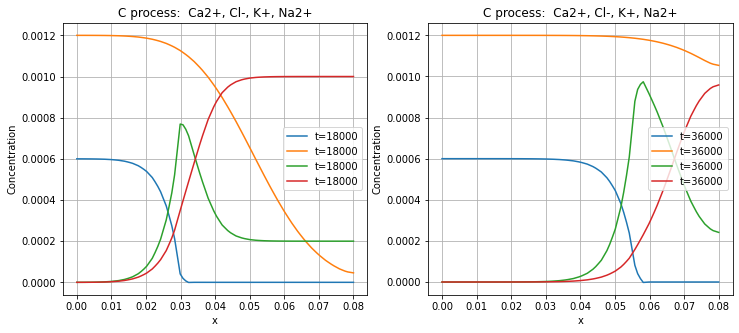

In [6]:
# read and process (point interpolation) vtu- and pvd-files 
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("exchangeOutput.pvd", dim=1)
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=0.08, num=100)]
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
r_x = np.array(xaxis)[:,0]
titlestring="C process: "
#
time = [18000]
for t in time:
    function_xaxis_t = pvdfile.read_point_set_data(t, 'Ca', pointsetarray=xaxis)
    ax[0].plot(r_x, function_xaxis_t, label='t='+str(t))
    function_xaxis_t = pvdfile.read_point_set_data(t, 'Cl', pointsetarray=xaxis)
    ax[0].plot(r_x, function_xaxis_t, label='t='+str(t))
    function_xaxis_t = pvdfile.read_point_set_data(t, 'K', pointsetarray=xaxis)
    ax[0].plot(r_x, function_xaxis_t, label='t='+str(t))
    function_xaxis_t = pvdfile.read_point_set_data(t, 'Na', pointsetarray=xaxis)
    ax[0].plot(r_x, function_xaxis_t, label='t='+str(t))
ax[0].set_title(titlestring+' Ca2+, Cl-, K+, Na2+')
#ax[0].set_yscale('log')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Concentration')
ax[0].legend()
ax[0].grid()
#
time = [36000]
for t in time:
    function_xaxis_t = pvdfile.read_point_set_data(t, 'Ca', pointsetarray=xaxis)
    ax[1].plot(r_x, function_xaxis_t, label='t='+str(t))
    function_xaxis_t = pvdfile.read_point_set_data(t, 'Cl', pointsetarray=xaxis)
    ax[1].plot(r_x, function_xaxis_t, label='t='+str(t))
    function_xaxis_t = pvdfile.read_point_set_data(t, 'K', pointsetarray=xaxis)
    ax[1].plot(r_x, function_xaxis_t, label='t='+str(t))
    function_xaxis_t = pvdfile.read_point_set_data(t, 'Na', pointsetarray=xaxis)
    ax[1].plot(r_x, function_xaxis_t, label='t='+str(t))
ax[1].set_title(titlestring+' Ca2+, Cl-, K+, Na2+')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Concentration')
ax[1].legend()
ax[1].grid()
#
plt.savefig("profile.png")
plt.show()

In [3]:
import time
print(time.ctime())

Tue Jul 13 22:02:15 2021


**Results have been shown using [matplotlib](https://matplotlib.org/)**

**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/reactive-transport/exchange/exchange/
- project file: https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Parabolic/ComponentTransport/ReactiveTransport/CationExchange/exchange.prj
- notebook provision (temporarily): https://github.com/OlafKolditz/ogs-jupyter-lab

**Credits**
- Renchao Lu for ogs6iphreeqc 
- Jörg Buchwald for ogs6py and VTUInterface (https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc)
- Jaime Garibay-Rodriguez for this benchmark set up
- Jaime Garibay-Rodriguez, Renchao Lu, Vanessa Montoya for benchmark description

please add further contributions (contact olaf.kolditz@ufz.de)